<h1 align="center"> DATA130051 Project 1</h1>

<div align="center"> Notebook Playground for DATA130051 Project 1</div>

<div align="center"> Author: 20307130201 张泽豪</div>

Author: Zehao Zhang 20307130201

Homepage: https://github.com/ForeverHaibara/DATA130051-Project-1 

# Introduction

## Dataset
The MNIST dataset in pkl.gz format is available at <a href=https://academictorrents.com/details/323a0048d87ca79b68f12a6350a57776b6a3b7fb>here</a>.




## Model
A trained model is available at the <a href =https://pan.baidu.com/s/1G9xUypIUgDcwl42_x8xdxw>cloud drive</a> 
with extracting password '**owor**'.

## Contents

- [Training](#training)
- [Hyperparameter Seaching](#hyperparameter-seaching)
- [Validation](#validation)
- [Visualization](#visualization)

# Training

In [22]:
import numpy as np
from neural_network import Network
from matplotlib import pyplot as plt
import pickle
import gzip

def load_data(path):
    f = gzip.open(path, 'rb')
    training_data, validation_data, test_data = pickle.load(f, encoding="latin1")
    f.close()
    return (training_data, validation_data, test_data)
    
# customize your dataset path
path = 'mnist.pkl.gz'
training_data , validation_data , test_data = load_data(path)

# training_data  : (50000 * 784, 50000)
# validation_data: (10000 * 784, 10000)
# test_data      : (10000 * 784, 10000)

# dataset
data_x = training_data[0]
data_y = np.eye(10)[training_data[1]]
valid_x = validation_data[0]
valid_y = np.eye(10)[validation_data[1]]

In [23]:
# set up a neural network
np.random.seed(2023)
nn = Network([784,500,10],['relu','sigmoid'], lr = 3e-2)

# if you want to load your model, use the code here
# nn = Network.load(r'mymodel.txt')

In [24]:
# train the model
result = nn.fit(data_x, data_y, epochs = 20, batch_size = 40, loss_func = 'MSE', 
                valid_x = valid_x, valid_y = valid_y, valid_freq = 1)

100%|██████████| 1250/1250 [00:11<00:00, 104.78it/s]


In [25]:
# save your model here
nn.save(r'mymodel.txt')

dict_keys(['loss', 'acc', 'loss_valid'])
Validation Accuracy = [0.9621, 0.9745, 0.9749, 0.9782, 0.9795, 0.9799, 0.9808, 0.9799, 0.9819, 0.982, 0.9823, 0.9824, 0.9815, 0.9827, 0.9825, 0.9821, 0.9823, 0.9825, 0.9824, 0.9825]


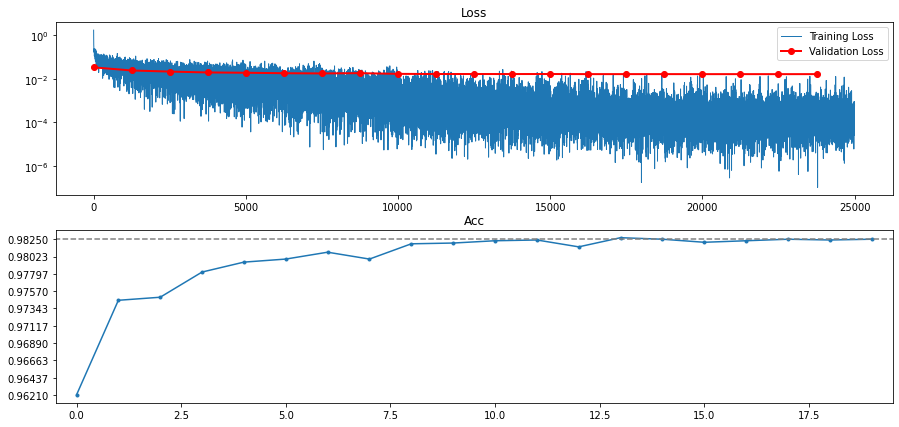

In [26]:
from plotter import plotter
print(result.keys())
plotter(result, True)

# Hyperparameter Seaching

Search for the best hyperparamters with varing hidden sizes, learning rates and regularizations.

To shorten the waiting time, here I have used reduced parameters for display. In practice, one could set larger epochs and use larger search range.

In [27]:
from IPython.display import clear_output
from time import sleep
hidden_sizes = [50, 200] #[50, 100, 200, 500, 600, 700, 800, 1000]
epochs = 5
accuracies = []
best = 0
best_acc = 0
for hidden_size in hidden_sizes:
    print(f'Training hidden size = {hidden_size}')
    sleep(0.25)
    np.random.seed(2023)
    nn = Network([784,hidden_size,10],['relu','sigmoid'], lr = 3e-3)
    result2 = nn.fit(data_x, data_y, epochs, 40, 'MSE', valid_x, valid_y, 1)
    accuracies.append(result2['acc'][-1])
    if result2['acc'][-1] > best_acc:
        best_acc = result2['acc'][-1]
        best = hidden_size
    clear_output(wait = True)
    
print('All acc =', accuracies)
print('Best Size =', best, '\nBest Acc =', best_acc)

All acc = [0.9499, 0.9593]
Best Size = 200 
Best Acc = 0.9593


In [28]:
from IPython.display import clear_output
from time import sleep
lrs = [3e-2, 3e-4] #[3, 3e-1, 3e-2, 3e-3, 3e-4, 3e-5]
epochs = 5
accuracies = []
best = 0
best_acc = 0
for lr in lrs:
    print(f'Training learning rate = {lr}')
    sleep(0.25)
    np.random.seed(2023)
    nn = Network([784,600,10],['relu','sigmoid'], lr = lr)
    result2 = nn.fit(data_x, data_y, epochs, 40, 'MSE', valid_x, valid_y, 1)
    accuracies.append(result2['acc'][-1])
    if result2['acc'][-1] > best_acc:
        best_acc = result2['acc'][-1]
        best = lr
    clear_output(wait = True)

print('All acc =', accuracies)
print('Best Lr =', best, '\nBest Acc =', best_acc)

All acc = [0.9795, 0.9168]
Best Lr = 0.03 
Best Acc = 0.9795


In [29]:
from IPython.display import clear_output
from time import sleep
regs = [1e-2, 1e-5] #[1e-2, 1e-3, 1e-4, 1e-5, 1e-6, 1e-7, 0]
epochs = 5
accuracies = []
best = 0
best_acc = 0
for reg in regs:
    print(f'Training regularization = {reg}')
    sleep(0.25)
    np.random.seed(2023)
    nn = Network([784,600,10],['relu','sigmoid'], lr = 3e-2, regws=[reg,reg])
    result2 = nn.fit(data_x, data_y, epochs, 40, 'MSE', valid_x, valid_y, 1)
    accuracies.append(result2['acc'][-1])
    if result2['acc'][-1] > best_acc:
        best_acc = result2['acc'][-1]
        best = reg
    clear_output(wait = True)
    
print('All acc =', accuracies)
print('Best Reg =', best, '\nBest Acc =', best_acc)

All acc = [0.6272, 0.9795]
Best Reg = 1e-05 
Best Acc = 0.9795


# Validation

Validate our model on the training data, validation data and the testing data.

In [30]:
# load your model
nn = Network.load(r'mymodel.txt')

In [31]:
from time import sleep 
print('-'*30 + '\nAccuracy on Training Data')
sleep(0.25)
nn.predict(data_x, data_y)
print('-'*30 + '\nAccuracy on Validation Data')
sleep(0.25)
nn.predict(validation_data[0], np.eye(10)[validation_data[1]])
print('-'*30 + '\nAccuracy on Testing Data')
sleep(0.25)
nn.predict(test_data[0], np.eye(10)[test_data[1]])
print(end = '')

------------------------------
Accuracy on Training Data


100%|██████████| 1250/1250 [00:01<00:00, 773.00it/s]


Acc = 49997/50000 = 99.994%
------------------------------
Accuracy on Validation Data


100%|██████████| 250/250 [00:00<00:00, 816.19it/s]


Acc = 9825/10000 = 98.25%
------------------------------
Accuracy on Testing Data


100%|██████████| 250/250 [00:00<00:00, 1088.28it/s]

Acc = 9846/10000 = 98.46%


Let's check the cases that our model fails to classify.

In [32]:
def extract_failure(nn, x, y):
    pred = nn.predict(x)
    failure = np.where(y != pred)
    return failure[0], pred[failure[0]], y[failure[0]]

nn = Network.load(r'mymodel.txt')
used_data = test_data  # try out training_data / validation_data / test_data
failure = extract_failure(nn, used_data[0], used_data[1])
print(failure[0]) # failed indices

100%|██████████| 250/250 [00:00<00:00, 1068.60it/s]

[   8  119  247  321  340  381  445  449  495  582  583  619  684  720
  740  900  938  951  956  965 1014 1039 1112 1156 1182 1224 1226 1232
 1242 1247 1299 1319 1378 1393 1500 1530 1549 1609 1671 1678 1681 1901
 1940 1941 2016 2035 2040 2044 2053 2070 2098 2109 2118 2130 2135 2182
 2185 2291 2369 2387 2454 2488 2597 2607 2648 2654 2743 2863 2877 2921
 2939 2953 3005 3073 3405 3422 3503 3520 3558 3597 3718 3780 3796 3808
 3811 3869 3906 3941 3943 3985 4065 4075 4078 4163 4176 4199 4224 4248
 4289 4360 4443 4497 4536 4601 4740 4807 4823 4879 4880 5331 5457 5600
 5642 5676 5734 5749 5936 5937 5955 5972 5973 6023 6045 6166 6555 6571
 6574 6597 6625 6641 6783 7216 8094 8246 8277 8293 8325 8408 8527 9009
 9015 9024 9280 9587 9634 9664 9729 9742 9745 9749 9770 9777 9808 9839]


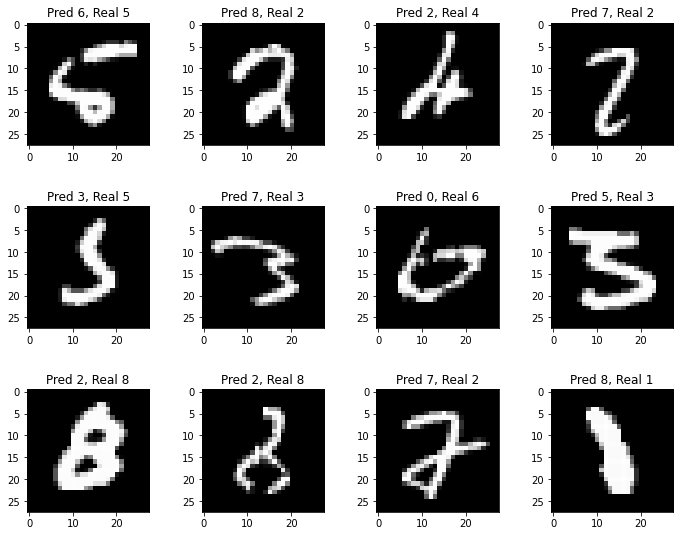

In [33]:
# a visualization of the failed cases
plt.figure(figsize=(12,9))
n = min(failure[0].size, 4)
m , n = min(failure[0].size // n, 3), n
for i in range(m):
    for j in range(n):
        k = i*n+j
        plt.subplot(m,n,k+1)
        plt.imshow(used_data[0][failure[0][k]].reshape((28,28)), cmap='gray')
        plt.title(f'Pred {failure[1][k]}, Real {failure[2][k]}')
plt.subplots_adjust(hspace=0.5)
plt.show()

# Visualization

Compare the visualized weights of network with 0, 1, and 20 training epochs.

In [34]:
# control group without training
np.random.seed(2023)
nn0 = Network([784,500,10],['relu','sigmoid'], lr = 3e-2)

# control group with only 1 epoch
np.random.seed(2023)
nn1 = Network([784,500,10],['relu','sigmoid'], lr = 3e-2)
result1 = nn1.fit(data_x, data_y, epochs = 1, batch_size = 40, loss_func = 'MSE', 
                valid_x = valid_x, valid_y = valid_y, valid_freq = 1)
print(result1['acc'])

100%|██████████| 1250/1250 [00:14<00:00, 83.95it/s]


[0.9621]


In [35]:
# load your model
nn = Network.load(r'mymodel.txt')

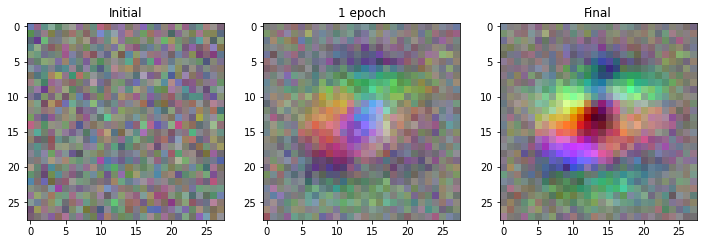

In [36]:
from sklearn.decomposition import PCA 

def nnPCA(nn, affine = False):
    '''Visualize the first layer of a network by PCA'''
    center_x = nn.weights[0].copy()# - np.mean(nn.weights[0])
    pca = PCA(n_components=3)
    PCA_X = pca.fit_transform(center_x)
    if affine:
        minimum, maximum = np.min(PCA_X), np.max(PCA_X)
        PCA_X = (PCA_X - minimum) * (1. / (maximum - minimum))
    else:
        PCA_X = np.clip(PCA_X, -1., 1.) * .5 + .5
    
    # to 28*28*3 RGB
    return PCA_X.reshape((28,28,3))
    

plt.figure(figsize = (12,9))
names = ['Initial','1 epoch','Final']
for i , network in enumerate([nn0, nn1, nn]):
    plt.subplot(1, 3, i+1)
    plt.imshow(nnPCA(network, affine = False))
    plt.title(names[i])
plt.show()